<a href="https://colab.research.google.com/github/visith1577/Machine-learning-first-projects/blob/main/audio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np 
import PIL

In [ ]:
file = '/content/drive/MyDrive/ESC-50-master/ESC-50-master/audio/1-101296-A-19.wav'

In [ ]:
signal, sr = librosa.load(file)

Text(0, 0.5, 'amplitude')

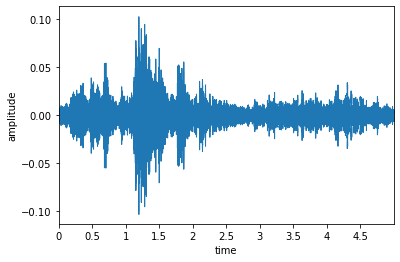

In [ ]:
import librosa.display
librosa.display.waveplot(signal, sr)
plt.xlabel('time')
plt.ylabel('amplitude')

In [ ]:
fft = np.fft.fft(signal)

In [ ]:
fft

array([-0.35779035+0.j        , -0.01216375-0.254437j  ,
       -0.1437656 +0.42840877j, ..., -0.12122952-0.2224746j ,
       -0.1437656 -0.42840877j, -0.01216375+0.254437j  ])

In [ ]:
magnitude = np.abs(fft)

In [ ]:
magnitude

array([0.35779035, 0.25472758, 0.45188784, ..., 0.2533605 , 0.45188784,
       0.25472758])

In [ ]:
frequency = np.linspace(0, sr, len(magnitude))

Text(0, 0.5, 'magnitude')

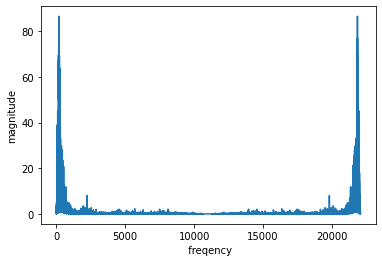

In [ ]:
plt.plot(frequency, magnitude)
plt.xlabel(' freqency')
plt.ylabel('magnitude')

In [ ]:
n_fft = 2048
hop_lenght = 512

stft = librosa.core.stft(signal, n_fft, hop_lenght)

In [ ]:
spectrogram = np.abs(stft)

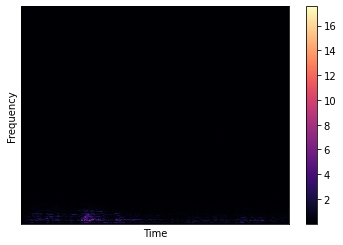

In [ ]:
librosa.display.specshow(spectrogram, sr = sr, hop_length = hop_lenght)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

In [ ]:
import IPython
import IPython.display as ipd

In [ ]:
ipd.Audio(file)

In [ ]:
import librosa.beat
tempo, beats = librosa.beat.beat_track(signal, sr)

In [ ]:
onset_env = librosa.onset.onset_strength(signal, sr=sr,
                                         aggregate=np.median)

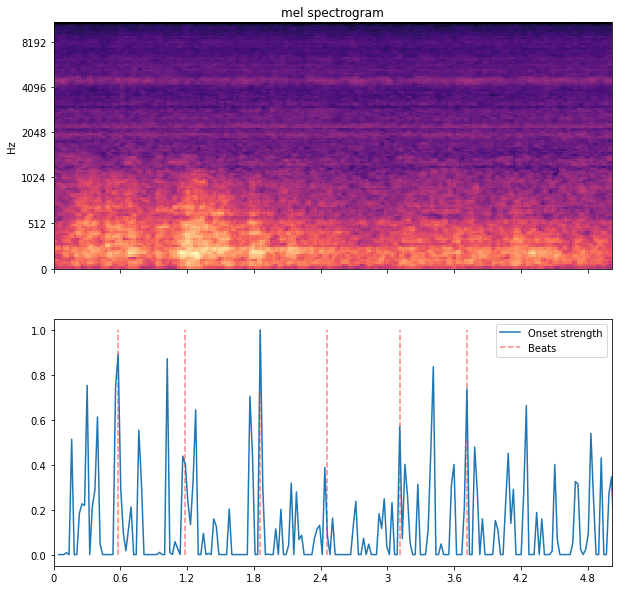

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))

times = librosa.times_like(onset_env, sr, hop_lenght, n_fft)
M = librosa.feature.melspectrogram(signal, sr)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', ax=ax[0])
ax[0].label_outer()
ax[0].set_title('mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend();